This is where we will do our final evaluation of combining all our metrics!

idea:
a pool is worth 10 points
a shelter is worth 5 points
and a playground equiptment is worth 1 point
the neighborhood with highest total points wins

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [14]:
#NOTE: each of these datasets has a column called "neighborhood"
playground_equip = pd.read_csv("Playground_Equiptment.csv")  
pools = pd.read_csv("Pools.csv")
shel = pd.read_csv("shelters_with_neighborhood_locations.csv")

# 2. Compute counts by neighborhood
# 2a. playground equipment
pge_counts = (playground_equip
             .groupby("neighborhood")
             .size()
             .rename("play_count"))
#This groups playground equiptment entries by neighborhood and counts how many rows each neighborhood has
#meaning it counts how many playground equiptment there are in each neighborhood

print(f"Playground equipment count:\n{pge_counts} \n")


# 2b. pools
pool_counts = (pools
               .groupby("neighborhood")
               .size()
               .rename("pool_count"))

print(f"pool count:\n{pool_counts} \n")

# 2c. shelters 
shel_counts = (shel
               .groupby("neighborhood")
               .size()
               .rename("shelter_count"))
print(f"shelter count:\n{shel_counts} \n")

Playground equipment count:
neighborhood
Allegheny Center       15
Allentown               4
Banksville              6
Bedford Dwellings       3
Beechview              21
                       ..
Upper Lawrenceville     5
West End                3
West Oakland            1
Westwood                2
Windgap                 5
Name: play_count, Length: 68, dtype: int64 

pool count:
neighborhood
Allegheny Center            1
Banksville                  1
Bedford Dwellings           1
Beechview                   1
Beltzhoover                 1
Bloomfield                  1
Brighton Heights            1
Brookline                   1
Carrick                     1
East Hills                  1
Greenfield                  1
Hazelwood                   1
Highland Park               2
Homewood South              1
Lincoln Place               1
Lincoln-Lemington-Belmar    1
Mount Washington            1
Perry North                 1
Polish Hill                 1
Shadyside                   1
She

                     play_count  pool_count  shelter_count  score
neighborhood                                                     
Highland Park                10           2             11     85
Squirrel Hill South          32           1              0     42
Beechview                    21           1              0     31
Sheraden                     13           1              1     28
East Liberty                 26           0              0     26
Perry North                   6           1              2     26
Beltzhoover                  10           1              1     25
Allegheny Center             15           1              0     25
South Side Flats              5           2              0     25
South Side Slopes            14           1              0     24


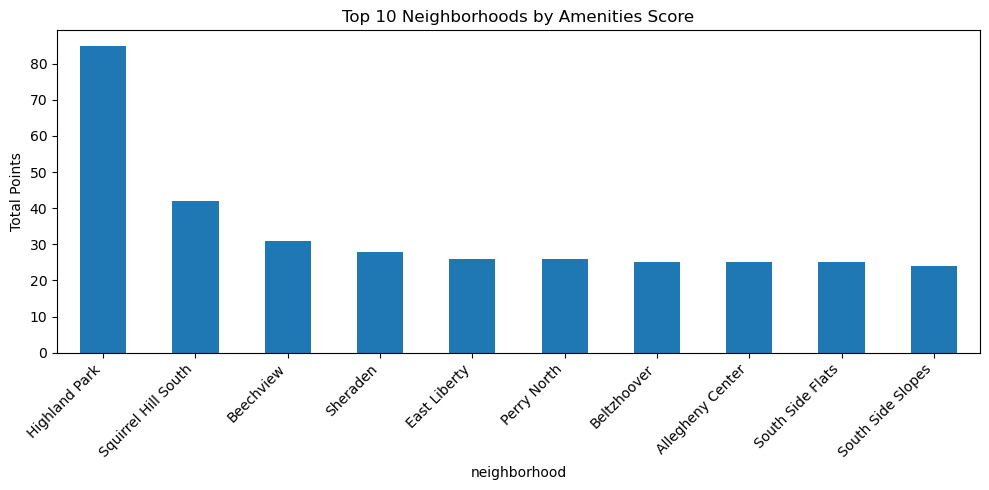

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load each dataset
playgrounds = pd.read_csv("Playground_Equiptment.csv")
pools = pd.read_csv("Pools.csv")
shelters = pd.read_csv("shelters_with_neighborhood_locations.csv")

# 2. Count amenities per neighborhood
pg_counts = playgrounds["neighborhood"].value_counts()
pool_counts = pools["neighborhood"].value_counts()
shel_counts = shelters["neighborhood"].value_counts()

# 3. Create a combined DataFrame with all neighborhoods
all_neighborhoods = pg_counts.index.union(pool_counts.index).union(shel_counts.index)
df = pd.DataFrame(index=all_neighborhoods)

# 4. Add the counts into the DataFrame
df["play_count"] = pg_counts.reindex(all_neighborhoods, fill_value=0)
df["pool_count"] = pool_counts.reindex(all_neighborhoods, fill_value=0)
df["shelter_count"] = shel_counts.reindex(all_neighborhoods, fill_value=0)

# 5. Compute the weighted score
WEIGHTS = {
    "pool_count": 10,
    "shelter_count": 5,
    "play_count": 1
}
df["score"] = (
    df["pool_count"] * WEIGHTS["pool_count"] +
    df["shelter_count"] * WEIGHTS["shelter_count"] +
    df["play_count"] * WEIGHTS["play_count"]
)

# 6. Sort and display top neighborhoods
top = df.sort_values("score", ascending=False)
print(top.head(10))

# 7. Optional: Plot the top 10 neighborhoods
fig, ax = plt.subplots(figsize=(10, 5))
top["score"].head(10).plot(kind="bar", ax=ax)
ax.set_ylabel("Total Points")
ax.set_title("Top 10 Neighborhoods by Amenities Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
